# Stoneburner, Kurt
- ## DSC 640 - Week 11 12

In [11]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#//*** PLotly standard imports
import plotly 
import plotly.express as px
import plotly.graph_objects as go


from shapely.geometry import Point
import geopandas as gpd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

Plotly Bullet Chart: https://plotly.com/python/bullet-charts/

Plotly Choropleth: https://plotly.com/python/choropleth-maps/


In [12]:
br_df = pd.read_csv("./wk1112/birth-rate.csv")
cr_df = pd.read_csv("./wk1112/crimeratesbystate-formatted.csv")
ed_df = pd.read_csv("./wk1112/education.csv")

t1_df = pd.read_excel("./wk1112/tabn084.xls")
t2_df = pd.read_excel("./wk1112/tabn106.xls")
t3_df = pd.read_excel("./wk1112/tabn146.xls")

#cr_df.hist()

In [13]:
cr_df

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8
6,Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5
7,Connecticut,2.9,20.0,113.0,138.6,437.1,1824.1,296.8
8,Delaware,4.4,44.7,154.8,428.2,688.9,2144.0,278.5
9,District of Columbia,35.4,30.2,672.1,721.3,649.7,2694.9,1402.3


In [14]:

plot_df = cr_df
plot_df = plot_df[plot_df['state'] != "District of Columbia"]
fig = px.histogram(plot_df, x="murder")
fig.show()

In [15]:
def get_plotly_visible_list(input_index,input_total):
    out = []
    
    for x in range(input_total):
        if input_index == -1:
            out.append(True)
        else:
            out.append(False)
    
    if input_index == -1:
        return out
    
    out[input_index] = True
    
    return out


colors = ["#9adabe",
"#e6afd3",
"#74d6e0",
"#e9b198",
"#7bcaed",
"#ced39f",
"#aebaeb"]

colors=["#fa7ee3",
"#f1ae37",
"#e0c939",
"#98dc4a",
"#6ae46d",
"#cbdd46",
"#41eea3"]

colors=px.colors.qualitative.G10
import plotly.express as px
plot_df = cr_df
plot_df = plot_df[plot_df['state'] != "District of Columbia"]
#fig = px.histogram(plot_df, x="murder")
#fig.show()

ci = 0
fig = go.Figure()
# Add Traces
fig.add_trace(
   go.Histogram(
      x = plot_df["murder"], name = 'Murder',nbinsx=10, marker_color=colors[ci],
   )
)

ci += 1
fig.add_trace(
   go.Histogram(
      x = plot_df["forcible_rape"], name = 'Rape',nbinsx=10,marker_color=colors[ci],
   )
)
ci += 1
fig.add_trace(
   go.Histogram(
      x = plot_df["robbery"], name = 'Robbery', nbinsx=10, marker_color=colors[ci],
   )
)
ci += 1
fig.add_trace(
   go.Histogram(
      x = plot_df["aggravated_assault"], name = 'Assault', nbinsx=10, marker_color=colors[ci],
   )
)
ci += 1
fig.add_trace(
   go.Histogram(
      x = plot_df["burglary"], name = 'Burglary', nbinsx=10, marker_color=colors[ci],
   )
)
ci += 1
fig.add_trace(
   go.Histogram(
      x = plot_df["larceny_theft"], name = 'Larceny', nbinsx=10,marker_color=colors[ci],
   )
)
ci += 1
fig.add_trace(
   go.Histogram(
      x = plot_df["motor_vehicle_theft"], name = 'Vehicle Theft', nbinsx=10,marker_color=colors[ci],
   )
)


button_count = 7
fig.layout.update(
        title_text="Distribution of All Crimes (by State) in the United States", # title of plot
        xaxis_title_text='Value', # xaxis label
        yaxis_title_text='Count', # yaxis label
         #bargroupgap=0.5, # gap between bars of adjacent location coordinates

   updatemenus = [
      go.layout.Updatemenu(
         type = "buttons", direction = "right", active = 0, x = 1, y = 1.1,
         buttons = list(
            [
               dict(
                  label = "All Crime", method = "update",
                  args = [{"visible": get_plotly_visible_list(-1,button_count)},{"title": "Distribution of All Crime (by State) in the United States"} ]
               ),

                dict(
                  label = "Murder", method = "update",
                  args = [{"visible": get_plotly_visible_list(0,button_count)},{"title": "Distribution of Murder (by State) in the United States"} ]
               ),
               dict(
                  label = "Rape", method = "update", 
                  args = [{"visible": get_plotly_visible_list(1,button_count)},{"title": "Distribution of Rape (by State) in the United States"}]
               ),
               dict(
                  label = "Robbery", method = "update", 
                  args = [{"visible": get_plotly_visible_list(2,button_count)},{"title": "Distribution of Robbery (by State) in the United States"}]
               ),
               dict(
                  label = "Assault", method = "update", 
                  args = [{"visible": get_plotly_visible_list(3,button_count)},{"title": "Distribution of Assault (by State) in the United States"}]
               ),
               dict(
                  label = "Burglary", method = "update", 
                  args = [{"visible": get_plotly_visible_list(4,button_count)},{"title": "Distribution of Burglary (by State) in the United States"}]
               ),
               dict(
                  label = "Larceny", method = "update", 
                  args = [{"visible": get_plotly_visible_list(5,button_count)},{"title": "Distribution of Larceny (by State) in the United States"}]
               ),
               dict(
                  label = "Vehicle Theft", method = "update", 
                  args = [{"visible": get_plotly_visible_list(6,button_count)},{"title": "Distribution of Vehicle Theft (by State) in the United States"}]
               ),

            ]
         )
      )
   ]
)
#//*** Show Figure (Hide the Toolbar)
fig.show(config={"displayModeBar": False, "showTips": False})

fig.write_html("output_wk11_12_python_plotly_histogram.raw", include_plotlyjs=False, full_html= False)


In [98]:
import plotly.express as px
plot_df = br_df
br_outlier_mean = br_df.loc[173][(br_df.loc[173].isna() == False) & (br_df.loc[173] != 132)][1:].mean()
plot_df = plot_df.replace(br_df[br_df.columns[1:]].max().max(),br_outlier_mean)
colors=px.colors.qualitative.Alphabet
#//*** One Ou

fig = go.Figure()
# Add Traces
ci=-1
for col in plot_df.columns[1:]:
    ci += 1
    if ci >= len(colors):
        ci=0
    color=colors[ci]   
    fig.add_trace(
       go.Box(
          y = plot_df[col], name = col,fillcolor=colors[ci],
            
           #//*** Whisker Color
            marker=dict(
                size=2,
                color='rgb(0, 0, 0)'
            ),
            line=dict(width=1),
          #boxpoints='all', # can also be outliers, or suspectedoutliers, or False
          #jitter=0.3, # add some jitter for a better separation between points
          #pointpos=-1.8 # relative position of points wrt box
       )
    )
fig.layout.update(
        title_text="Global Birth Rate Distribution 1960-2008", # title of plot
        showlegend=False,
)

#//*** Show Figure (Hide the Toolbar)
fig.show(config={"displayModeBar": False, "showTips": False})

fig.write_html("output_wk11_12_python_plotly_boxplot.raw", include_plotlyjs=False, full_html= False)


In [102]:

fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta", value = 220,
    domain = {'x': [0.1, 1], 'y': [0, 1]},
    title = {'text' :"<b>Profit</b>"},
    delta = {'reference': 200},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 300]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': 280},
        'steps': [
            {'range': [0, 150], 'color': "lightgray"},
            {'range': [150, 250], 'color': "gray"}]}))
fig.update_layout(height = 250)
fig.show()

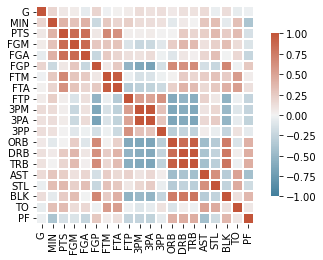

In [23]:
bb_df = pd.read_csv("./wk0910/z_wk09_10_ppg2008.csv")


fig,ax = plt.subplots()

# Define a nice color map for our heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=bb_df.corr(),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0)  
# show the heatmap
plt.show()

In [20]:
#//*** NBA Per Game Performance
#//** top 50 scoreres during the 2008-2009 Season
#//*** Column Names
col_dict = {
    "G" : "Games",
    "MIN" : "Minutes",
    "PTS" : "Points",
    "FGM" : "Field Goals Made",
    "FGA" : "Field Goal Attempts",
    "FGP" : "Field Goal Percentage",
    "FTM" : "Free Throw Made",
    "FTA" : "Free Throw Attempt",
    "FTP" : "Free Throw Percentage",
    "3PM" : "Three Pointers Made",
    "3PA" : "Three Point Attempts",
    "3PP" : "Three Point Percentage",
    "ORB" : "Offensive Rebounds",
    "DRB" : "Defensive Rebounds",
    "TRB" : "Total Rebounds",
    "AST" : "Assists",
    "STL" : "Steals",
    "BLK" : "Blocks",
    "TO" : "Turnovers"
}
bb_df.sort_values("G",ascending=False).set_index("Name  ").style.background_gradient(cmap ='cividis')\
    .set_properties(**{'font-size': '10px'})


,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Ben Gordon,82,36.600000,20.700000,7.300000,16.000000,0.455000,4.000000,4.700000,0.864000,2.100000,5.100000,0.410000,0.600000,2.800000,3.500000,3.400000,0.900000,0.300000,2.400000,2.200000
O.J. Mayo,82,38.000000,18.500000,6.900000,15.600000,0.438000,3.000000,3.400000,0.879000,1.800000,4.600000,0.384000,0.700000,3.100000,3.800000,3.200000,1.100000,0.200000,2.800000,2.500000
Kobe Bryant,82,36.200000,26.800000,9.800000,20.900000,0.467000,5.900000,6.900000,0.856000,1.400000,4.100000,0.351000,1.100000,4.100000,5.200000,4.900000,1.500000,0.500000,2.600000,2.300000
Richard Jefferson,82,35.900000,19.600000,6.500000,14.900000,0.439000,5.100000,6.300000,0.805000,1.400000,3.600000,0.397000,0.700000,3.900000,4.600000,2.400000,0.800000,0.200000,2.000000,3.100000
Andre Iguodala,82,39.800000,18.800000,6.600000,14.000000,0.473000,4.600000,6.400000,0.724000,1.000000,3.200000,0.307000,1.100000,4.600000,5.700000,5.300000,1.600000,0.400000,2.700000,1.900000
LeBron James,81,37.700000,28.400000,9.700000,19.900000,0.489000,7.300000,9.400000,0.780000,1.600000,4.700000,0.344000,1.300000,6.300000,7.600000,7.200000,1.700000,1.100000,3.000000,1.700000
Pau Gasol,81,37.100000,18.900000,7.300000,12.900000,0.567000,4.200000,5.400000,0.781000,0.000000,0.000000,0.500000,3.200000,6.400000,9.600000,3.500000,0.600000,1.000000,1.900000,2.100000
Antawn Jamison,81,38.200000,22.200000,8.300000,17.800000,0.468000,4.200000,5.600000,0.754000,1.400000,3.900000,0.351000,2.400000,6.500000,8.900000,1.900000,1.200000,0.300000,1.500000,2.700000
Paul Pierce,81,37.400000,20.500000,6.700000,14.600000,0.457000,5.700000,6.800000,0.830000,1.500000,3.800000,0.391000,0.700000,5.000000,5.600000,3.600000,1.000000,0.300000,2.800000,2.700000


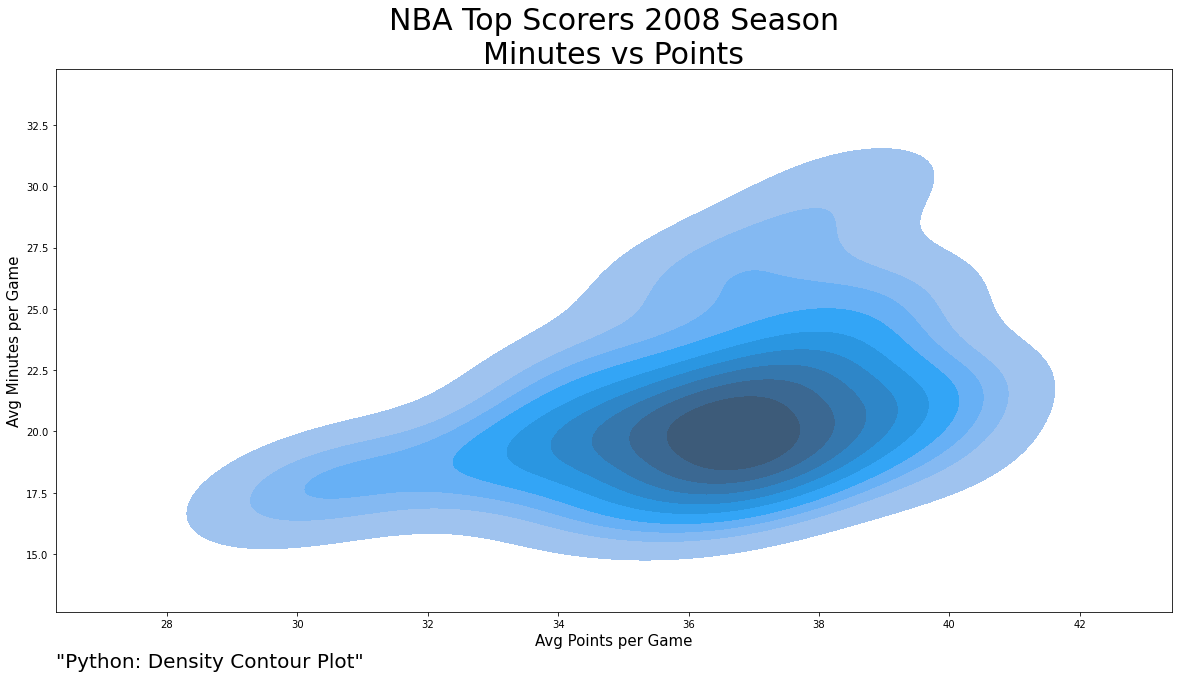

In [21]:
#//*** Initialize the subplots
fig, ax = plt.subplots()

#//*** Size the plot
fig = plt.gcf()
fig.set_size_inches(20,10)

ax = sns.kdeplot(
    data=bb_df, x="MIN", y="PTS", fill=True,
)

plt.title("NBA Top Scorers 2008 Season\nMinutes vs Points",fontsize=30)
ax.set_xlabel("Avg Points per Game",fontsize=15)
ax.set_ylabel("Avg Minutes per Game",fontsize=15)

plt.text(0,-.1,'"Python: Density Contour Plot"', size=20, transform=ax.transAxes)
plt.show()

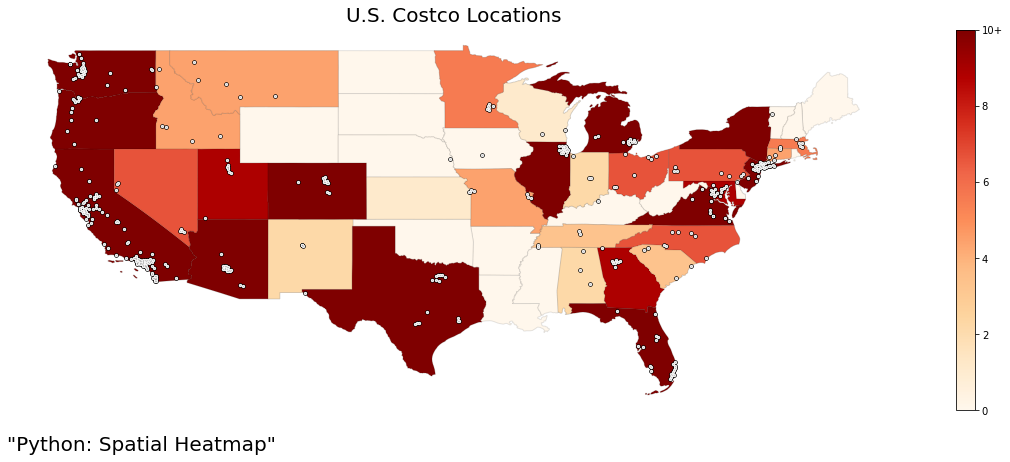

In [22]:
#//*** Load the Costco Data set
costco_df = pd.read_csv("./wk0910/z_wk09_10_costcos-geocoded.csv")

#//*** Combine the Longitude and Latitutde Columns into a single column
costco_df['coordinates'] = costco_df[['Longitude', 'Latitude']].values.tolist()

#//*** Convert the coordinates to Geopandas Points
costco_df['coordinates'] = costco_df['coordinates'].apply(Point)

#//*** Convert Costco to a GeoPandas DataFrame
geo_costco_df = gpd.GeoDataFrame(costco_df, geometry='coordinates')

#//*** Get the number of Costcos for each State
tdf = pd.DataFrame(costco_df.groupby('State').nunique()['Zip Code'])

#//*** Move the States From the Index to Columns
tdf = tdf.reset_index()

#//*** Rename Columns
tdf.columns = ['State',"count"]

#//*** A few states have a high concentration of costcos. For scaling purposes, reset all values over 10 to 10.
tdf.loc[tdf[f"count"] > 10,f"count"]=10
tdf


#//*** Load a Shape File of all States into a GeoPandas Frame
states = gpd.read_file('maps\cb_2018_us_state_20m.shp')

#//*** Remove Alaskam Hawaii, Puerto Rico
states = states[states['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False]
geo_costco_df = geo_costco_df[geo_costco_df['State'].isin(['Alaska','Hawaii','Puerto Rico']) == False]

#//*** Set the Base column to zero. This is used to draw a map of all states and set the color to 0.
#//*** This draws all the States. This is used to fill in the States that don't have Costcos
states['base'] = 0

#//*** Merge States GeoPandas with the Costco Counts
rankings_df = states.merge(tdf,left_on='NAME',right_on='State')

#//*** Pick a Color map
#//*** https://matplotlib.org/stable/tutorials/colors/colormaps.html
color_map = "YlOrRd"
color_map = "OrRd"

# Create colorbar as a legend
#//*** The Scale is set between 0 and 10
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(color_map), norm=plt.Normalize(vmin=0, vmax=10))

#//*** Initialize the subplots
fig, ax = plt.subplots()

#//*** Size the plot
fig = plt.gcf()
fig.set_size_inches(20,10)


sm._A = []

#//*** Custom Colorbar ticks
cbar = fig.colorbar(sm,shrink=.7,ticks=[0,2,4,6,8,10])
cbar.ax.set_yticklabels(["0","2","4","6","8","10+"])

#//*** Plot the base map with the 0 color of the colormap
ax=states.plot(column='base', cmap=plt.get_cmap(color_map), edgecolor=(0,0,0,.1), ax=ax,)

#//*** Plot the Heatmap based on Costco Counts
ax=rankings_df.plot(column='count', cmap=plt.get_cmap(color_map), edgecolor=(0,0,0,.1), ax=ax)

#//*** Plot Costco locations based on Lat and Long. 
#//*** Drawing the marker 3 times to all some texture and additional color. This White Dots with Black outline, 
#//*** with a small gray dot in the Middle.

ax=geo_costco_df.plot(ax=ax, marker=".",color="black", markersize=50)
ax=geo_costco_df.plot(ax=ax, marker=".",color="white", markersize=20)
ax=geo_costco_df.plot(ax=ax, marker=".",color=(0,0,0,.2), markersize=1)
ax.axis('off')
plt.title("U.S. Costco Locations",fontsize=20)
plt.text(0,-.1,'"Python: Spatial Heatmap"', size=20, transform=ax.transAxes)
plt.show()